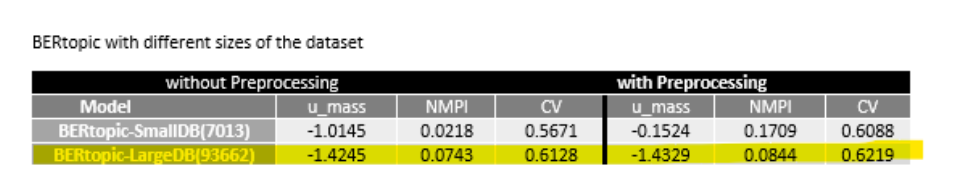

In [2]:
import pandas as pd
import numpy as np


df = pd.read_csv('pppm_abstract.csv')
Ab_df=df.dropna()
Ab_df=Ab_df.reset_index(drop=True)
Ab_df

,abstract
0,The subject matters of the invention are: a cr...
1,The present invention relates to the treatment...
2,The invention relates to a composition compris...
3,The invention relates to an improved process f...
4,The present invention relates to a new method ...
...,...
93657,Individual measuring sensors each have a diffe...
93658,"Vehicle (10, 100) comprising at least three dr..."
93659,A customer loyalty programme operated by an op...
93660,An inflatable pipe tube fabric assembly for G-...


In [5]:
Ab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93662 entries, 0 to 93661
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   abstract  93662 non-null  object
dtypes: object(1)
memory usage: 731.9+ KB


In [ ]:
############## withoou Preprocessing

In [7]:
# Topic model
from bertopic import BERTopic

# Dimension reduction
from umap import UMAP

# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
                  
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(Ab_df['abstract'])                  

In [8]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,48106,-1_data_the_of_to
1,0,1615,0_uplink_station_ue_wireless
2,1,999,1_light_led_lamp_lighting
3,2,624,2_catalyst_stream_reactor_hydrocarbon
4,3,513,3_solar_photovoltaic_cell_collector
...,...,...,...
739,738,10,738_wm_simulation_mqtt_stuatu
740,739,10,739_vehicle_observer_camera_object
741,740,10,740_microscope_probe_microactuator_cantilever
742,741,10,741_stabiliser_emulsion_stabilizer_solutions


In [9]:
# Get top 10 terms for a topic
topic_model.get_topic(0)

[('uplink', 0.012716266949084634),
 ('station', 0.012245828912622768),
 ('ue', 0.011763406092588784),
 ('wireless', 0.011195270035382711),
 ('downlink', 0.010511926343615035),
 ('resource', 0.009431610134692864),
 ('channel', 0.009289992809168802),
 ('transmission', 0.008448699494243877),
 ('radio', 0.007832395659100346),
 ('communication', 0.007486865442059864)]

In [17]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]

# Save the predictions in the dataframe
Ab_df['topic_prediction'] = topic_prediction

# Take a look at the data
Ab_df

,abstract,topic_prediction
0,The subject matters of the invention are: a cr...,-1
1,The present invention relates to the treatment...,448
2,The invention relates to a composition compris...,36
3,The invention relates to an improved process f...,-1
4,The present invention relates to a new method ...,-1
...,...,...
93657,Individual measuring sensors each have a diffe...,-1
93658,"Vehicle (10, 100) comprising at least three dr...",82
93659,A customer loyalty programme operated by an op...,-1
93660,An inflatable pipe tube fabric assembly for G-...,388


In [18]:
# New data for the new_Abstarct
new_Abstarct = "A heart valve with an annular valve body defining an orifice and having a plurality of struts forming a pair of cages on opposite sides of the orifice. A spherical closure member is captively held within the cages and is moved by blood flow between the open and closed positions in check valve fashion. A slight leak or backflow is provided in the closed position by making the orifice slightly larger than the closure member. Blood flow is maximized in the open position of the valve by providing an inwardly convex contour on the orifice-defining surfaces of the body. An annular rib is formed in a channel around the periphery of the valve body to anchor a suture ring used to secure the valve within a heart."

# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_Abstarct, top_n=num_of_topics); 

# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

The top 3 similar topics are [141, 25, 204], and the similarities are [0.43 0.43 0.37]


In [19]:
# Print the top keywords for the top similar topics
for i in range(num_of_topics):
    print(f'The top keywords for topic {similar_topics[i]} are:')
    print(topic_model.get_topic(similar_topics[i]))

The top keywords for topic 141 are:
[('heart', 0.05592794573012191), ('leaflet', 0.039102487491517804), ('valve', 0.03760275455419838), ('mitral', 0.03412954760875196), ('leaflets', 0.028995858303706653), ('annulus', 0.028905583025904933), ('prosthetic', 0.028124553584208768), ('native', 0.015664794247346722), ('annuloplasty', 0.015200922315688674), ('commissure', 0.01469116183532658)]
The top keywords for topic 25 are:
[('valve', 0.05116257326822035), ('seat', 0.00945770870191735), ('closing', 0.0075064544047370755), ('fluid', 0.007191466203745656), ('port', 0.006176768356617674), ('open', 0.006007488382843096), ('flow', 0.0059751545110810515), ('solenoid', 0.005779952359758622), ('valves', 0.005772891789796568), ('inlet', 0.005549215645725619)]
The top keywords for topic 204 are:
[('pacing', 0.06337485220724763), ('atrial', 0.04431407166071535), ('cardiac', 0.03509620125421726), ('ventricular', 0.03246181366143194), ('heart', 0.026460080385195695), ('defibrillation', 0.02467861554641

In [20]:
#Evaluation:

In [21]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": Ab_df['abstract'],
                          "ID": range(len(Ab_df['abstract'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()

In [22]:
#It is worth mentioning that the highest the score of the c v, the more coherent and understandable a topic can be to a human. While in the case of c umass, the closer the score is to 0, the better.
print("C_V is: ", coherence_CV)

C_V is:  0.6128748404814669


In [23]:
documents = pd.DataFrame({"Document": Ab_df['abstract'],
                          "ID": range(len(Ab_df['abstract'])),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence_u_mass = coherence_model.get_coherence()

In [24]:
print("u_mass is: ",coherence_u_mass)

u_mass is:  -1.4245127913049107


In [25]:
documents = pd.DataFrame({"Document": Ab_df['abstract'],
                          "ID": range(len(Ab_df['abstract'])),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_npmi')
coherence_C_NPMI = coherence_model.get_coherence()

In [26]:
print("c_npmi is: ",coherence_C_NPMI)

c_npmi is:  0.07430981449112688


In [27]:
####################### with processing

In [3]:
df = pd.read_csv('pppm_abstract.csv')
Ab_df=df.dropna()
Ab_df_Pre=Ab_df.reset_index(drop=True)
Ab_df_Pre

,abstract
0,The subject matters of the invention are: a cr...
1,The present invention relates to the treatment...
2,The invention relates to a composition compris...
3,The invention relates to an improved process f...
4,The present invention relates to a new method ...
...,...
93657,Individual measuring sensors each have a diffe...
93658,"Vehicle (10, 100) comprising at least three dr..."
93659,A customer loyalty programme operated by an op...
93660,An inflatable pipe tube fabric assembly for G-...


In [4]:
# Text preprocessiong
import nltk

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

Ab_df_Pre['abstract_cleaned'] = Ab_df_Pre['abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
Ab_df_Pre['abstract_cleaned'] = Ab_df_Pre['abstract_cleaned'].replace("  ", " ")
    
# convert to lowercase
Ab_df_Pre['abstract_cleaned'] = Ab_df_Pre['abstract_cleaned'].str.lower()
    
#remove numbers
Ab_df_Pre['abstract_cleaned'] =Ab_df_Pre['abstract_cleaned'].replace(r'\d+', '', regex = True)
        
#remove_symbols
Ab_df_Pre['abstract_cleaned']  = Ab_df_Pre['abstract_cleaned'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
#remove punctuations 
Ab_df_Pre['abstract_cleaned'] = Ab_df_Pre['abstract_cleaned'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
 #remove_URL(x):
Ab_df_Pre['abstract_cleaned']  = Ab_df_Pre['abstract_cleaned'].replace(r'https.*$', "", regex = True)

# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
# Remove stopwords
Ab_df_Pre['abstract_cleaned'] = Ab_df_Pre['abstract_cleaned'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))

# Lemmatization
Ab_df_Pre['abstract_cleaned'] = Ab_df_Pre['abstract_cleaned'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))
Ab_df_Pre.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:177: FutureWarning: Possible nested set at position 1
  re.compile(obj)


,abstract,abstract_cleaned
0,The subject matters of the invention are: a cr...,subject matter invention crystallographic mode...
1,The present invention relates to the treatment...,present invention relates treatment neurodegen...
2,The invention relates to a composition compris...,invention relates composition comprising viral...
3,The invention relates to an improved process f...,invention relates improved process preparing m...
4,The present invention relates to a new method ...,present invention relates new method preventio...


In [5]:
# Topic model
from bertopic import BERTopic

# Dimension reduction
from umap import UMAP

# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
                  
# Initiate BERTopic
topic_model_pre = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)

# Run BERTopic model
topics, probabilities = topic_model_pre.fit_transform(Ab_df_Pre['abstract_cleaned']) 

In [6]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": Ab_df_Pre['abstract_cleaned'],
                          "ID": range(len(Ab_df_Pre['abstract_cleaned'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model_pre._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model_pre.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model_pre.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()

In [7]:
print("C_V is: ", coherence_CV)

C_V is:  0.6219441488849441


In [8]:
documents = pd.DataFrame({"Document": Ab_df_Pre['abstract_cleaned'],
                          "ID": range(len(Ab_df_Pre['abstract_cleaned'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model_pre._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model_pre.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model_pre.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_npmi')
coherence_C_NPMI= coherence_model.get_coherence()

In [9]:
print("c_npmi is: ",coherence_C_NPMI)

c_npmi is:  0.08441715809548431


In [10]:
documents = pd.DataFrame({"Document": Ab_df_Pre['abstract_cleaned'],
                          "ID": range(len(Ab_df_Pre['abstract_cleaned'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model_pre._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model_pre.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model_pre.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence_u_mass= coherence_model.get_coherence()

In [11]:
print("u_mass is: ",coherence_u_mass)

u_mass is:  -1.4329968490768645
